In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

origin_df=pd.read_csv("https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1")
age_df=pd.read_csv("https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1")


origin_df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [57]:
# count & summarize the # of de novo mutations in each proband
pat=origin_df.loc[origin_df["Phase_combined"]=="father"]
mat=origin_df.loc[origin_df["Phase_combined"]=="mother"]


In [81]:
# Pt 3 count & summarize the # of de novo mutations in each proband

pat_list=[]
mat_list=[]
tot_list=[]

for pid in origin_df["Proband_id"].unique().tolist():
    
    pat_proband = len(pat[pat["Proband_id"] == pid].index)
    pat_list.append(pat_proband)
    mat_proband = len(mat[mat["Proband_id"] == pid].index)
    mat_list.append(mat_proband)
    tot_proband = len(origin_df[origin_df["Proband_id"] == pid].index)
    tot_list.append(tot_proband)

    data = {'Proband': origin_df["Proband_id"].unique().tolist(),
            'pat_dnm': pat_list,
            'mat_dnm': mat_list,
            'tot_dnm': tot_list}
    

new_df = pd.DataFrame (data, columns = ['Proband','pat_dnm', 'mat_dnm', 'tot_dnm'])

new_df

,Proband,pat_dnm,mat_dnm,tot_dnm
0,99379,38,8,47
1,8147,78,27,114
2,5410,52,16,70
3,46025,40,11,52
4,144769,49,13,63
...,...,...,...,...
391,36485,44,7,51
392,19715,40,9,52
393,131854,48,7,58
394,67028,31,7,38


In [82]:
# Pt 4 Use the pandas merge function to combine the above df with the df with maternal & paternal ages
age_df

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [86]:
# Pt 4 

merged_df = new_df.merge(age_df, left_on='Proband', right_on='Proband_id')

merged_df.drop(columns='Proband_id')

,Proband,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,99379,38,8,47,24,21
1,8147,78,27,114,40,33
2,5410,52,16,70,27,18
3,46025,40,11,52,21,23
4,144769,49,13,63,22,19
...,...,...,...,...,...,...
391,36485,44,7,51,32,19
392,19715,40,9,52,27,25
393,131854,48,7,58,31,19
394,67028,31,7,38,23,25


<AxesSubplot:xlabel='Father_age', ylabel='pat_dnm'>

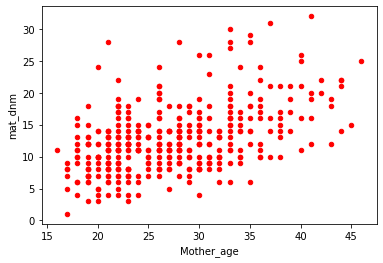

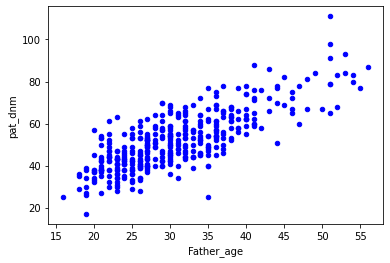

In [90]:
# Pt 5 plot maternal/paternal age vs. maternal/paternal DNMs 
merged_df.plot(kind='scatter',x='Mother_age',y='mat_dnm',color='red')
merged_df.plot(kind='scatter',x='Father_age',y='pat_dnm',color='blue')

In [115]:
# Pt 7 Use smf.ols() to test for an association between maternal age and mat_dnm.
matmodel = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = merged_df)
results = matmodel.fit()
results.summary()


# significant
# size: 0.3776

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        11:34:05   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Pt 7 Use smf.ols() to test for an association between paternal age and pat_dnm.
patmodel = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = merged_df)
results = patmodel.fit()
results.summary()

# significant
# size: 1.3528

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        11:34:06   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 11.,  36.,  88., 110.,  76.,  37.,  19.,   7.,   8.,   4.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

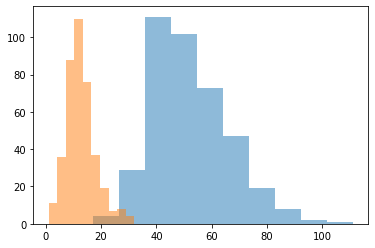

In [117]:
# Pt 8 create a histogram of maternal/paternal DNMs per proband
fig, ax=plt.subplots()
ax.hist(merged_df["pat_dnm"], alpha=0.5)
ax.hist(merged_df["mat_dnm"], alpha=0.5)

In [124]:
# Pt 9 Test whether the number of mat_dnm per proband is significantly different than the # of pat_dnm per proband.
# using a paired t test instead of independent t test
# because we compare the maternal & paternal DNMs in the same person
stats.ttest_rel(merged_df["pat_dnm"], merged_df["mat_dnm"])

# the numbers of maternal & paternal DNMs are statistically significant

Ttest_relResult(statistic=61.60929763491804, pvalue=1.1245140794572799e-204)

In [119]:
# Pt 10 Re-fit the models (questions 9, 10, and 12) above using Poisson regression.

# refit for paternal age

patmodel_poisson = smf.poisson(formula = "pat_dnm ~ Father_age", data = merged_df)
results = patmodel_poisson.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        11:34:57   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [120]:
# refit for maternal age

matmodel_poisson = smf.poisson(formula = "mat_dnm ~ Mother_age", data = merged_df)
results = matmodel_poisson.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        11:35:01   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [122]:
# unsure how this works

new_dp=pd.DataFrame({"Father_age" : [50.5]})
patmodel_poisson.predict(new_dp)

ValueError: shapes (396,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)